In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E28-3FB0

 Directory of C:\Users\HP\Desktop\Assingments\assingment no.14(Desision tree)

12/15/2022  04:29 PM    <DIR>          .
12/15/2022  04:29 PM    <DIR>          ..
12/15/2022  02:01 PM    <DIR>          .ipynb_checkpoints
12/13/2022  10:34 AM            17,023 Company_Data.csv
12/15/2022  04:29 PM         1,288,358 CompanyData_DT.ipynb
12/14/2022  05:43 PM            18,826 Fraud_check.csv
12/15/2022  12:36 PM         3,655,463 Fraud_checkDecision Tree.ipynb
12/13/2022  10:34 AM             1,377 problem statement(company data).txt
12/14/2022  05:24 PM               470 Problem_statement(Fraudcheck).txt
               6 File(s)      4,981,517 bytes
               3 Dir(s)  140,089,057,280 bytes free


In [3]:
cd=pd.read_csv('Company_Data.csv')

In [4]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Data Understanding

In [5]:
cd.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
cd.shape

(400, 11)

In [7]:
cd.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# Data Processing

In [8]:
cd['ShelveLoc'].unique(),cd['Urban'].unique(),cd['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [10]:
cd['ShelveLoc']=LE.fit_transform(cd['ShelveLoc'])
cd['Urban']=LE.fit_transform(cd['Urban'])
cd['US']=LE.fit_transform(cd['US'])

In [11]:
cd.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [21]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# Converting Sales Into Categorical Variable

In [ ]:
cd.insert(11,"sales_variable",'')
cd

In [42]:
for i in range(0,len(cd['Sales'])):
    if cd['Sales'][i]>=11.0:
        cd['sales_variable'][i] = 'High'
    elif cd['Sales'][i]<=6.0:
        cd['sales_variable'][i] = 'Low'
    else:
        cd['sales_variable'][i] = 'Medium'

In [43]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


# Model building

In [44]:
X=cd.iloc[:,1:-1]
Y=cd.iloc[:,-1]

In [45]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [46]:
Y.head()

0    Medium
1      High
2    Medium
3    Medium
4       Low
Name: sales_variable, dtype: object

# Split Into Training And Testing Data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [48]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
303,133,52,16,290,99,2,43,11,1,1
349,134,27,18,467,96,2,49,14,0,1
149,121,120,13,140,87,2,56,11,1,1
100,113,69,11,94,106,2,76,12,0,1
175,115,89,0,38,122,2,25,12,1,0
...,...,...,...,...,...,...,...,...,...,...
369,135,100,22,463,122,2,36,14,1,1
320,136,70,12,171,152,2,44,18,1,1
15,149,95,5,400,144,2,76,18,0,0
125,89,78,0,181,49,2,43,15,0,0


In [33]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
332,106,33,20,354,104,2,61,12,1,1
111,132,118,12,272,151,2,43,14,1,1
352,133,103,14,288,122,1,61,17,1,1
205,113,22,1,317,132,2,28,12,1,0
56,133,82,0,54,84,2,50,17,1,0
...,...,...,...,...,...,...,...,...,...,...
304,123,98,12,408,134,1,29,10,1,1
187,117,32,0,142,96,0,62,17,1,0
166,119,67,17,151,137,2,55,11,1,1
64,100,67,12,184,104,2,32,16,0,1


In [34]:
y_train

303    Medium
349    Medium
149      High
100       Low
175    Medium
        ...  
369    Medium
320       Low
15     Medium
125    Medium
265       Low
Name: sales_variable, Length: 320, dtype: object

In [35]:
y_test

332       Low
111    Medium
352      High
205       Low
56       High
        ...  
304      High
187    Medium
166    Medium
64     Medium
27        Low
Name: sales_variable, Length: 80, dtype: object

# Model Training Testing And Evaluation

# Using GINI

In [36]:
model= DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [37]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Medium    46
Low       27
High       7
dtype: int64

In [38]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.675

In [39]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       0.57      0.36      0.44        11
         Low       0.70      0.70      0.70        27
      Medium       0.67      0.74      0.70        42

    accuracy                           0.68        80
   macro avg       0.65      0.60      0.62        80
weighted avg       0.67      0.68      0.67        80



In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,preds))

[[ 4  0  7]
 [ 0 19  8]
 [ 3  8 31]]


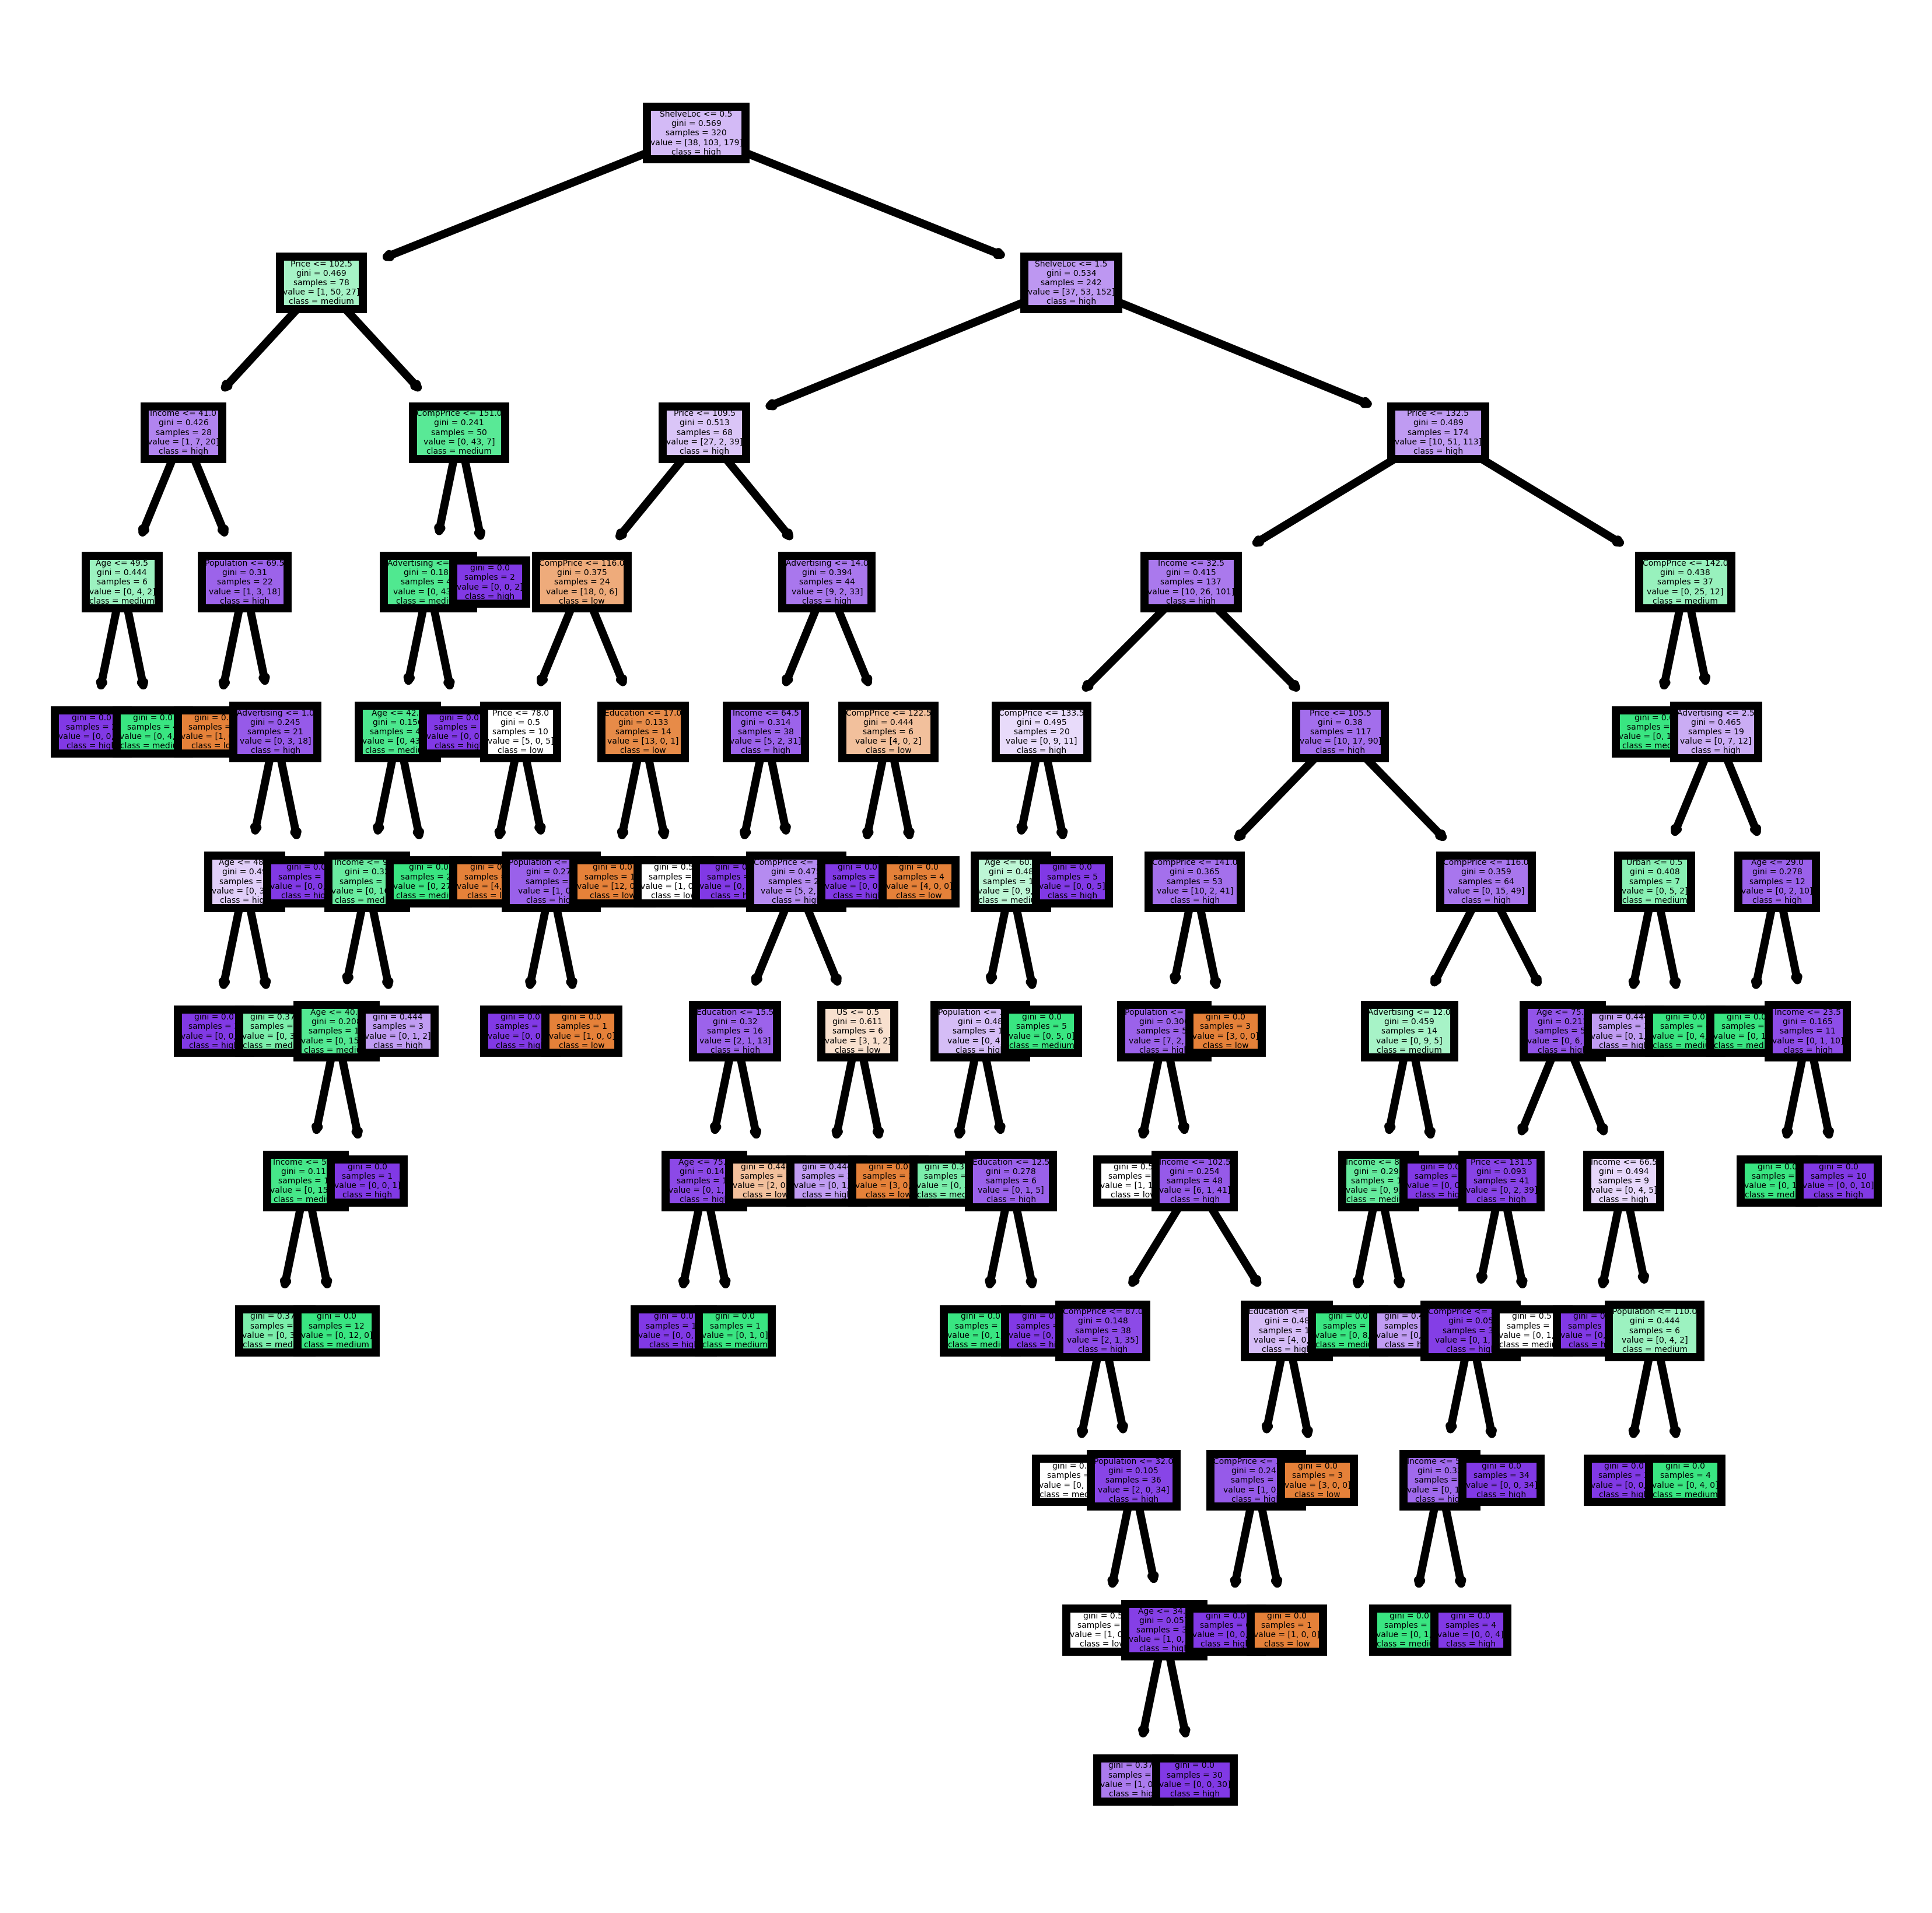

In [41]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['low','medium','high']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
plt.show()

# Using enotropy

In [49]:
new_model = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5)
new_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [50]:
preds = new_model.predict(x_test) 
pd.Series(preds).value_counts()

Medium    47
Low       24
High       9
dtype: int64

In [51]:
#Prediction and computing the accuracy
preds=new_model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.6125

In [52]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       0.44      0.36      0.40        11
         Low       0.67      0.59      0.63        27
      Medium       0.62      0.69      0.65        42

    accuracy                           0.61        80
   macro avg       0.58      0.55      0.56        80
weighted avg       0.61      0.61      0.61        80



# feature selection technique

In [93]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [94]:
rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [95]:
rfe_features = x_train.columns[rfe.get_support()]
rfe_features

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [96]:
x_train_transform_rfe = rfe.transform(x_train)
x_test_transform_rfe = rfe.transform(x_test)

In [97]:
rfe_model = DecisionTreeClassifier()
rfe_model.fit(x_train_transform_rfe,y_train)

DecisionTreeClassifier()

In [98]:
y_pred_rfe = rfe_model.predict(x_test_transform_rfe)

In [99]:
imp_feature_rfe=rfe_model.feature_importances_

In [100]:
rfe_data=pd.DataFrame({'feature':rfe_features,'imp_feature':imp_feature_rfe})
rfe_data=rfe_data.sort_values('imp_feature')

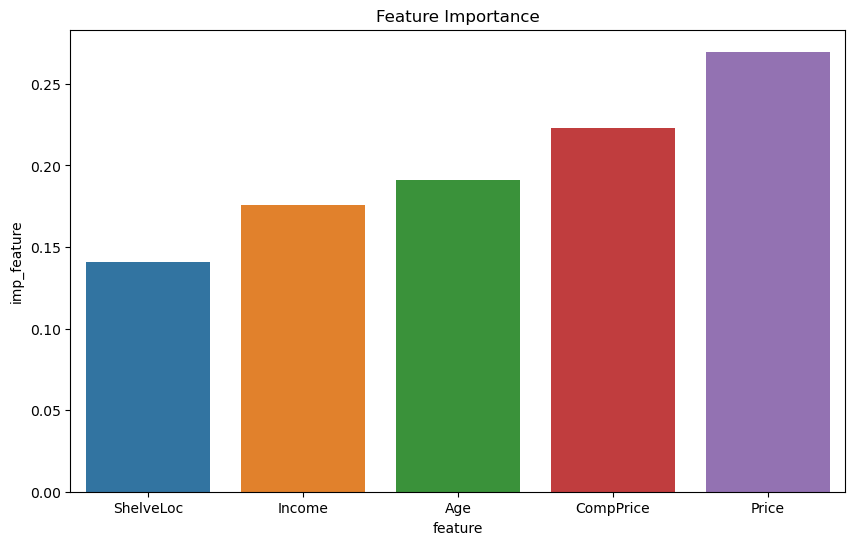

In [102]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='imp_feature', x='feature', data=rfe_data)
plt.show()